# Data Mining Final Project - Clustering of Boarding Patterns in Public Transport

Author: Tuğba Güler

Student number: 20150807012

In [ ]:
# Import libraries
import os, types
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans

In [ ]:
# read the csv file
data_file = pd.read_csv('20191218-30min-PassengerCount.csv')
df = data_file

# Understanding the data set

In [ ]:
# show first 7 rows of dataset
df.head(7)

,Line,BoardingTime,PassengerCount
0,KC06,2019-12-18T00:00,1
1,LF09,2019-12-18T00:00,3
2,TC93,2019-12-18T00:00,1
3,TL94,2019-12-18T00:00,1
4,TL94,2019-12-18T01:00,1
5,VF01,2019-12-18T03:30,4
6,AC03,2019-12-18T05:30,7


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerCount,1839.0,173.09516,154.66015,1.0,74.0,131.0,216.0,990.0


In [ ]:
# checked for missing value in dataset
df.isnull().any()

Line              False
BoardingTime      False
PassengerCount    False
dtype: bool

In [ ]:
# It is shown how many of the vehicles used in the line
df['Line'].value_counts()

VF01      39
KC06      39
LF09      39
TL94      39
DC15      38
KL08      38
TC93      38
DC15A     38
AF04      37
VL13A     37
FL82      37
VS18      37
MC12      37
VF02      37
AC03      37
UC11      37
LC07      37
MF40      37
KC35      36
LF10      36
TC16      36
TC16A     36
VL13      36
TCD49     36
511       36
LC07A     36
TCP45     36
AF04A     36
VC57      36
VF63      35
VML55A    35
KC35A     35
VML54     35
GM24      35
ML22      35
CV48      35
CV14      35
VF66      35
KPZ83     35
KF52      35
VC59      35
CV67      35
TB72      35
TK36      35
KC33      35
CV47      35
KM61      35
TCD49A    34
MZ78      34
UC32      34
VC53      33
Name: Line, dtype: int64

In [ ]:
df['BoardingTime'].value_counts()

2019-12-18T15:30    51
2019-12-18T10:30    51
2019-12-18T21:30    51
2019-12-18T12:30    51
2019-12-18T11:30    51
2019-12-18T21:00    51
2019-12-18T16:00    51
2019-12-18T13:00    51
2019-12-18T19:00    51
2019-12-18T09:30    51
2019-12-18T13:30    51
2019-12-18T11:00    51
2019-12-18T19:30    51
2019-12-18T07:00    51
2019-12-18T17:00    51
2019-12-18T14:30    51
2019-12-18T22:00    51
2019-12-18T20:30    51
2019-12-18T15:00    51
2019-12-18T09:00    51
2019-12-18T08:00    51
2019-12-18T14:00    51
2019-12-18T07:30    51
2019-12-18T08:30    51
2019-12-18T10:00    51
2019-12-18T12:00    51
2019-12-18T20:00    51
2019-12-18T18:00    51
2019-12-18T18:30    51
2019-12-18T16:30    51
2019-12-18T06:30    51
2019-12-18T17:30    51
2019-12-18T22:30    50
2019-12-18T06:00    48
2019-12-18T23:00    48
2019-12-18T23:30    29
2019-12-19T00:00    13
2019-12-18T05:30    13
2019-12-18T00:00     4
2019-12-18T01:00     1
2019-12-18T03:30     1
Name: BoardingTime, dtype: int64

In [ ]:
df['PassengerCount'].value_counts()

1      17
69     16
131    14
109    14
87     14
       ..
437     1
175     1
444     1
448     1
990     1
Name: PassengerCount, Length: 483, dtype: int64

In [ ]:
df1 = data_file.pivot(index = 'Line', columns = 'BoardingTime', values = 'PassengerCount')
df1 = df1.replace(np.nan, 0)

In [ ]:
print('----------Line-Time relationship--------')
print(df1)
df1.to_csv('line-days.csv')

----------Line-Time relationship--------
BoardingTime  2019-12-18T00:00  ...  2019-12-19T00:00
Line                            ...                  
511                        0.0  ...               0.0
AC03                       0.0  ...               0.0
AF04                       0.0  ...               0.0
AF04A                      0.0  ...               0.0
CV14                       0.0  ...               0.0
CV47                       0.0  ...               0.0
CV48                       0.0  ...               0.0
CV67                       0.0  ...               0.0
DC15                       0.0  ...               1.0
DC15A                      0.0  ...               1.0
FL82                       0.0  ...               0.0
GM24                       0.0  ...               0.0
KC06                       1.0  ...               9.0
KC33                       0.0  ...               0.0
KC35                       0.0  ...               0.0
KC35A                      0.0  ...      

In [ ]:
print('----------Preferred Line--------')
n = input('Input bus count that you want : ')
n = int(n)
bus = []
for i in range(n):
    strtmp = 'Input {}-th preferred bus -------> '.format(i+1)
    line = input(strtmp)
    bus.append(line)
df2 = df1.loc[bus]
print(df2)
df2.to_csv('preferred_bus.csv')

----------Preferred Line--------
Input bus count that you want : 5
Input 1-th preferred bus -------> KL08
Input 2-th preferred bus -------> UC11
Input 3-th preferred bus -------> VC53
Input 4-th preferred bus -------> TC16
Input 5-th preferred bus -------> KC35
BoardingTime  2019-12-18T00:00  ...  2019-12-19T00:00
Line                            ...                  
KL08                       0.0  ...               5.0
UC11                       0.0  ...               5.0
VC53                       0.0  ...               0.0
TC16                       0.0  ...               0.0
KC35                       0.0  ...               0.0

[5 rows x 41 columns]


In [ ]:
print('----------Preferred Time--------')
n = input('Input BoardingTime count that you want : ')
n = int(n)
botime = []
for i in range(n):
    strtmp = 'Input {}-th perferred time -------> '.format(i+1)
    line = input(strtmp)
    botime.append(line)
df3 = df1[botime]
print(df3)
df3.to_csv('preferred_time.csv')

----------Preferred Time--------
Input BoardingTime count that you want : 4
Input 1-th perferred time -------> 2019-12-18T22:00
Input 2-th perferred time -------> 2019-12-18T11:00
Input 3-th perferred time -------> 2019-12-18T03:30
Input 4-th perferred time -------> 2019-12-18T21:30
BoardingTime  2019-12-18T22:00  ...  2019-12-18T21:30
Line                            ...                  
511                       92.0  ...              46.0
AC03                      45.0  ...              40.0
AF04                      78.0  ...              37.0
AF04A                     22.0  ...              35.0
CV14                      74.0  ...             113.0
CV47                      21.0  ...              26.0
CV48                      62.0  ...              25.0
CV67                      29.0  ...              22.0
DC15                      79.0  ...              43.0
DC15A                     50.0  ...              86.0
FL82                      47.0  ...              49.0
GM24          

In [ ]:
print('----------Preferred Passenger Count--------')
n = input('Input passenger count that you want : ')
n = int(n)
df4 = data_file.query('PassengerCount >= {}'.format(n))
print(df4)
df4.to_csv('preferred_passenger.csv')

----------Preferred Passenger Count--------
Input passenger count that you want : 131
       Line      BoardingTime  PassengerCount
75     DC15  2019-12-18T06:30             147
76    DC15A  2019-12-18T06:30             142
84     KL08  2019-12-18T06:30             138
89     LF09  2019-12-18T06:30             132
90     LF10  2019-12-18T06:30             144
...     ...               ...             ...
1685   UC11  2019-12-18T22:00             133
1698   VS18  2019-12-18T22:00             154
1716   KL08  2019-12-18T22:30             152
1722   LF10  2019-12-18T22:30             143
1761   KC06  2019-12-18T23:00             132

[933 rows x 3 columns]


# Using Clustering Algorithms



**K-Means Clustering Algorithms**


In [ ]:
df = data_file
for i in range(0, 37):
    h = int(np.floor(i / 2)) + 6
    m = (i % 2) * 30
    # The zfill() method adds zeros (0) at the beginning of the string, until it reaches the specified length.
    strh = '{0}'.format(h).zfill(2)
    strm = '{0}'.format(m).zfill(2)
    if h == 24:
        strtime = '2019-12-19T00:00'
    else:
        strtime = '2019-12-18T' + strh + ':' + strm
        #strtime = '2019-12-18'

    df = df.replace({'BoardingTime': strtime}, {'BoardingTime': h + m / 60})
    #print(df)

In [ ]:
for i in range(len(df1)):
    strtmp = df1.index[i]
    df = df.replace({'Line': strtmp}, {'Line': i + 1})

In [ ]:
kmeans = KMeans(n_clusters = 3)
cluster_ids = kmeans.fit_predict(df[["PassengerCount"]])
df.insert(3, 'ClusterNo', cluster_ids)
centroids = kmeans.cluster_centers_
print('----------Centroids of kmeana--------')
print(centroids)

----------Centroids of kmeana--------
[[ 89.25125209]
 [583.82550336]
 [252.86382114]]


In [ ]:
k = []
for i in range(len(centroids)):
    k.append(20)

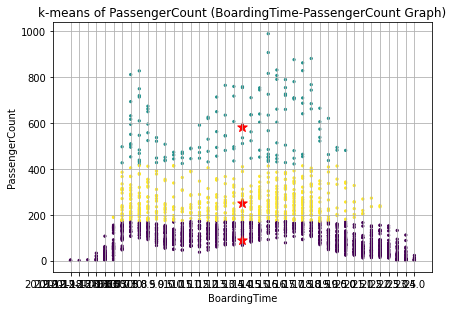

In [ ]:
plt.scatter(df.BoardingTime.astype(str), df.PassengerCount, c = df.ClusterNo.astype(float), marker='o', s=5)
plt.scatter(k, centroids[:,0], c='red', marker='*', edgecolors='red', s=100)
plt.grid()
plt.tight_layout()
plt.xlabel('BoardingTime')
plt.ylabel('PassengerCount')
plt.title('k-means of PassengerCount (BoardingTime-PassengerCount Graph)')
plt.show()

In [ ]:
k = []
for i in range(len(centroids)):
    k.append(26)

In [ ]:
print('----------Line Index--------')
print(df1.index)

----------Line Index--------
Index(['511', 'AC03', 'AF04', 'AF04A', 'CV14', 'CV47', 'CV48', 'CV67', 'DC15',
       'DC15A', 'FL82', 'GM24', 'KC06', 'KC33', 'KC35', 'KC35A', 'KF52',
       'KL08', 'KM61', 'KPZ83', 'LC07', 'LC07A', 'LF09', 'LF10', 'MC12',
       'MF40', 'ML22', 'MZ78', 'TB72', 'TC16', 'TC16A', 'TC93', 'TCD49',
       'TCD49A', 'TCP45', 'TK36', 'TL94', 'UC11', 'UC32', 'VC53', 'VC57',
       'VC59', 'VF01', 'VF02', 'VF63', 'VF66', 'VL13', 'VL13A', 'VML54',
       'VML55A', 'VS18'],
      dtype='object', name='Line')


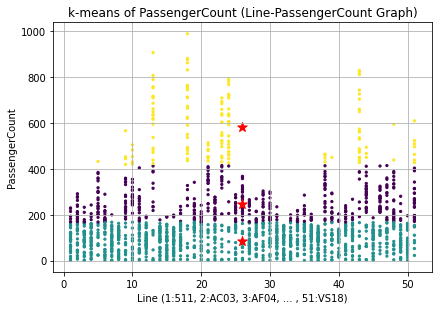

In [ ]:
plt.scatter(df.Line, df.PassengerCount, c = df.ClusterNo.astype(float), marker='o', s=5)
plt.scatter(k, centroids[:,0], c='red', marker='*', edgecolors='red', s=100)
plt.grid()
plt.tight_layout()
plt.xlabel('Line (1:511, 2:AC03, 3:AF04, ... , 51:VS18)')
plt.ylabel('PassengerCount')
plt.title('k-means of PassengerCount (Line-PassengerCount Graph)')
plt.show()

Time - PassengerCount

In [ ]:
print('--------------BoardingTime-Passenger relationship-----------')
df = pd.DataFrame(df1.sum(),  columns=['PassengerCount'])
print(df)

--------------BoardingTime-Passenger relationship-----------
                  PassengerCount
BoardingTime                    
2019-12-18T00:00             6.0
2019-12-18T01:00             1.0
2019-12-18T03:30             4.0
2019-12-18T05:30           117.0
2019-12-18T06:00          1190.0
2019-12-18T06:30          3657.0
2019-12-18T07:00          9486.0
2019-12-18T07:30         14819.0
2019-12-18T08:00         14617.0
2019-12-18T08:30         12367.0
2019-12-18T09:00          9244.0
2019-12-18T09:30          8233.0
2019-12-18T10:00          7963.0
2019-12-18T10:30          7821.0
2019-12-18T11:00          8203.0
2019-12-18T11:30          8713.0
2019-12-18T12:00          9762.0
2019-12-18T12:30         10215.0
2019-12-18T13:00         10269.0
2019-12-18T13:30         11016.0
2019-12-18T14:00         10840.0
2019-12-18T14:30         10941.0
2019-12-18T15:00         12225.0
2019-12-18T15:30         16007.0
2019-12-18T16:00         14615.0
2019-12-18T16:30         13968.0
2019-12-18T17:0

In [ ]:
cluster_count = 5
kmeans = KMeans(n_clusters = cluster_count)
cluster_ids = kmeans.fit_predict(df[["PassengerCount"]])
print('---Clustering result when n_clusters = ', cluster_count, ' :')
centroids = kmeans.cluster_centers_
print('centroids : ')
print(centroids)

---Clustering result when n_clusters =  5  :
centroids : 
[[10606.90909091]
 [ 3519.66666667]
 [14440.625     ]
 [ 7706.        ]
 [  419.375     ]]


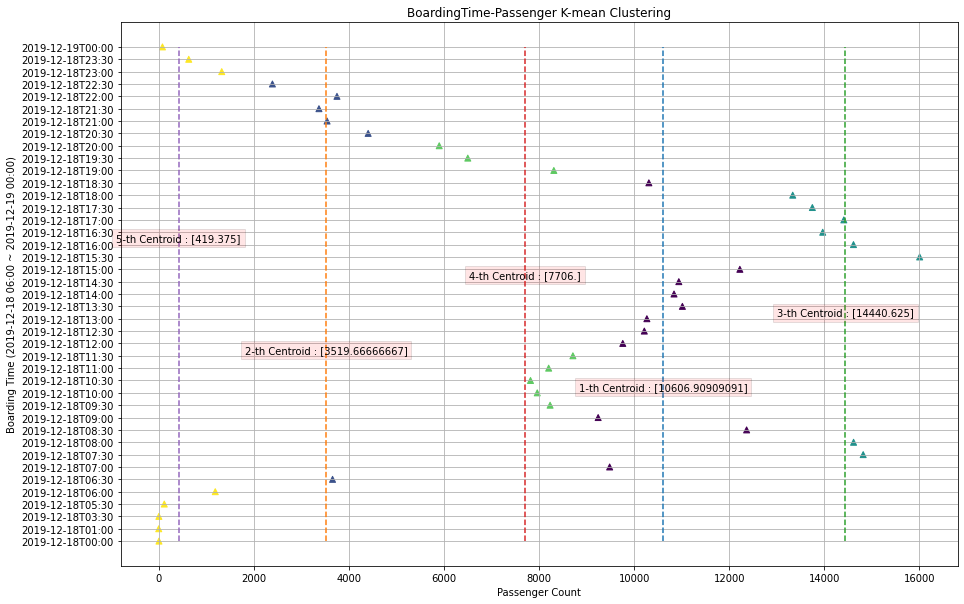

In [ ]:
figure(figsize=(15, 10))
ylabel = df.index
y = range(len(ylabel))
x = df.PassengerCount
#plt.subplot(221)
plt.title("BoardingTime-Passenger K-mean Clustering")
plt.scatter(x, y, c = cluster_ids.astype(float), marker = '^')
plt.yticks(y, ylabel)
plt.grid(True)
plt.ylabel("Boarding Time (2019-12-18 06:00 ~ 2019-12-19 00:00)")
plt.xlabel("Passenger Count")
for i in range(len(centroids)):
    y = [0, len(ylabel) - 1]
    x = [centroids[i], centroids[i]]
    plt.plot(x, y, '--')
    s = '{}-th Centroid : {}'.format(i + 1, centroids[i])
    k = (len(ylabel) - 1) / 2 + (i - len(centroids) / 2) * 3
    plt.text(centroids[i], k,  s,
             bbox=dict(facecolor='red', alpha=0.1),
             fontsize=10, horizontalalignment='center', verticalalignment='center')
plt.show()

Line - PassengerCount

In [ ]:
#Line-Passenger relationship
print('--------------Line-Passenger relationship-----------')
df = pd.DataFrame(df1.sum(1),  columns=['PassengerCount'])
print(df)

--------------Line-Passenger relationship-----------
        PassengerCount
Line                  
511             4015.0
AC03            5331.0
AF04            3834.0
AF04A           3688.0
CV14            7539.0
CV47            4476.0
CV48            3050.0
CV67            3230.0
DC15            7948.0
DC15A           8531.0
FL82            5666.0
GM24            3284.0
KC06           17457.0
KC33            3260.0
KC35            3023.0
KC35A           3058.0
KF52            3784.0
KL08           19400.0
KM61            5378.0
KPZ83           4175.0
LC07           10564.0
LC07A           5859.0
LF09           14692.0
LF10           16795.0
MC12            5495.0
MF40            7478.0
ML22            4186.0
MZ78            3962.0
TB72            5817.0
TC16            5236.0
TC16A           3703.0
TC93            3028.0
TCD49           3053.0
TCD49A          4121.0
TCP45           4894.0
TK36            3933.0
TL94            3137.0
UC11            9095.0
UC32            4839.0
VC53

In [ ]:
cluster_count = 5
kmeans = KMeans(n_clusters = cluster_count)
cluster_ids = kmeans.fit_predict(df[["PassengerCount"]])
print('---Clustering result when n_clusters = ', cluster_count, ' :')
centroids = kmeans.cluster_centers_
print('centroids : ')
print(centroids)

---Clustering result when n_clusters =  5  :
centroids : 
[[16908.4       ]
 [ 5343.41666667]
 [ 9648.25      ]
 [ 3520.41666667]
 [ 7762.66666667]]


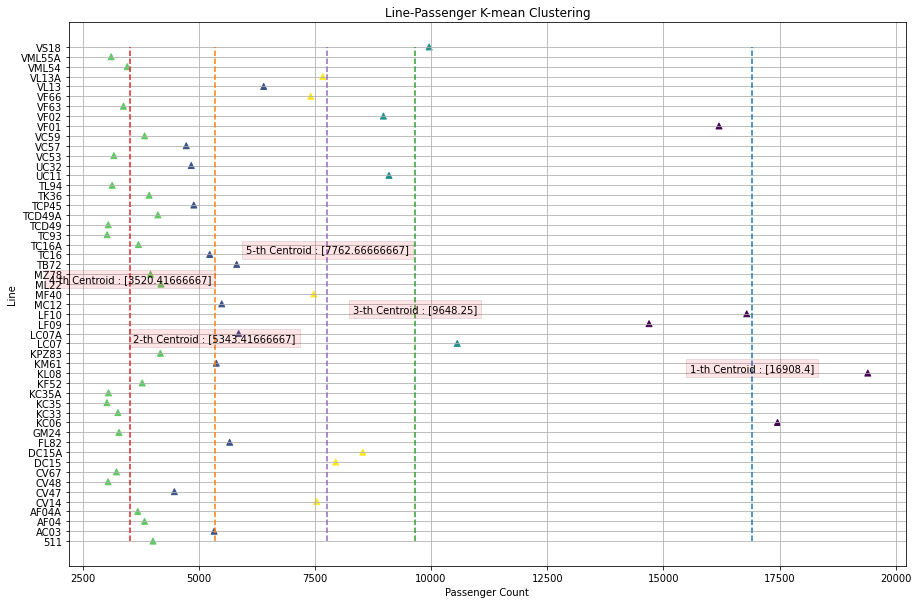

In [ ]:
figure(figsize=(15, 10))
ylabel = df.index
y = range(len(ylabel))
x = df.PassengerCount
#plt.subplot(221)
plt.title("Line-Passenger K-mean Clustering")
plt.scatter(x, y, c = cluster_ids.astype(float), marker = '^')
plt.yticks(y, ylabel)
plt.grid(True)
plt.ylabel("Line")
plt.xlabel("Passenger Count")
for i in range(len(centroids)):
    y = [0, len(ylabel) - 1]
    x = [centroids[i], centroids[i]]
    plt.plot(x, y, '--')
    s = '{}-th Centroid : {}'.format(i + 1, centroids[i])
    k = (len(ylabel) - 1) / 2 + (i - len(centroids) / 2) * 3
    plt.text(centroids[i], k,  s,
             bbox=dict(facecolor='red', alpha=0.1),
             fontsize=10, horizontalalignment='center', verticalalignment='center')
plt.show()